# Lab 1. Deep Learning Environment

## L1.1. Create a local DL environment

* Use Anaconda and create a new environment with the libraries that we are going to use in this subject.
* As a reference in this table you can see the packages and their current versions used in this lecture note.

| Software               | Package             | DL version | Description                                 |
|------------------------|---------------------|------------|---------------------------------------------|
| Python                 | python              | 3.12.12    | Python interpreter                          |
| Jupyter Notebooks      | notebook            | 7.5.0      | Notebooks environment.                      |
| Jupyter Lab.           | jupyterlab          | 4.5.0      | IDE-like notebooks.                         |
| TensorFlow             | tensorflow          | 2.20.0     | Google's low-level DL framework             |
| Keras                  | keras               | 3.12.0     | Google's high-level DL framework            |
| JAX                    | jax                 | 0.8.0      | Google's alternative low-level DL framework |
| Matplotlib             | matplotlib          | 3.10.7     | Graphics library                            |
| TensorFlow Datasets    | tensorflow-datasets | 4.9.9      | Datasets library                            |
| Pydot                  | pydot               | 4.0.4      | Interface with Graphviz graphical library.  |
|                        | pydotplus           | 2.0.2      |                                             | 
|                        | graphviz            | 0.21       |                                             |
| VisualKeras            | visualkeras         | 0.2.0      | Visual representation of keras models       |


## L1.2. Test your local environment with the MNIST dataset

### 1.2.1. MNIST: the "Hello World" of deep learning

*  The MNIST (Modified National Institute of Standards and Technology) is a database of handwritten digits.
* It is commonly used to train and test image processing systems in the field of machine learning. One could say that it is the *Hello World* of this field.
* It is composed of 60,000 training images and 10,000 test images.
* Each image has dimensions of 28x28 pixels in grayscale and represents one of the ten possible digits (from 0 to 9).

<!--- * El conjunto de entrenamiento será un tensor 3D de `(60000, 28, 28)` y el conjunto de test un tensor 3D de `(10000, 28, 28)` siendo el `dtype` un `uint8`. --->

<img src="images/keras-mnist.png" width=594 height=361/>

* The MNIST data are preloaded into Keras in the form of four NumPy arrays: two pair for training and two pair for testing
* Each pair (training or test) has an array to store the image data and an array with the labels corresponding to each image.
* We import the `mnist` package that stores the corresponding data.

In [1]:
from keras.datasets import mnist

* We load the training data and the test data as a NumPy `ndarray` object.
* NumPy (http://www.numpy.org/) is the fundamental package for scientific computing with Python.
* It contains, among other things:
    - An object to represent n-dimensional arrays (`ndarray`) efficiently.
    - Fast array-oriented arithmetic operations with flexible broadcasting capabilities.
    - Mathematical functions that allow you to efficiently perform operations on arrays without having to write loops.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
type(train_images)

numpy.ndarray

* Let’s look at the training data.
* `shape`is an attribute of a `ndarray`.
* It contains a tuple of integers indicating the size of each of the array dimensions. 
* The length of the tuple will be the number of array dimensions.

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

* And here’s the test data:

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

### 1.2.2. MNIST: Preparing the data

* We need to prepare the data to what the network expects from them.
* The images are an array of dimensions `(60000, 28, 28)` of type `uint8` with values of `[0, 255]`.
* First, they must be transformed into an array of dimensions `(60000, 28 * 28)` 
  - The image is flatten to a simple array of `28 * 28 = 784` values.
  - We use the NumPy `reshape` function that changes the shape of an array without changing its data (https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)


In [10]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

* Second, they must be tranformed to a float type `float32` with values between 0 and 1.
    - Each value ranges from 0 to 255 (levels of gray) and should be normalized to values between 0 and 1 (dividing by 255).
    - We use the NumPy `astype` function that copies the array and cast its values to a specified type.
    - When we divide an `ndarray` by a number we divide each element of the array by that number.

In [11]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

* We also need to categorically encode the labels using the *one-hot* encoding.
* In this encoding we convert an integer into an array of integers in which all values are set to zero except the value that corresponded to the original integer which is set to one.
* We use the `to_categorical` function that converts integers to a binary class matrix (https://keras.io/api/utils/python_utils/)

In [12]:
train_labels[2]

np.uint8(4)

In [13]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
train_labels[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

### 1.2.3. MNIST: Building the Model and Layers

#### Sequential model

* We are going to use the Keras sequential model.
* We use the `Sequential` class (https://keras.io/api/models/sequential/) to create a sequential model.

In [15]:
import keras
from keras import layers

model = keras.Sequential()

#### Input layer

* The first layer to create is an input layer that receives the input (https://keras.io/api/layers/core_layers/input/).
* The most important parameter in the constructor of `Input` is `shape`, a tuple of integer that indicates the shape of the input.
* For instance, `shape=(784,)` indicates that the expected input will be batches of 784-dimensional vectors (our 28x28 images). 
* Elements of this tuple can be `None` representing dimensions where the shape is not known.
* We add this layer to the model using the `add` method.
* **Using the `Input` object the model knows the input shape from the start and can build the weights.**

In [16]:
model.add(layers.Input(shape=(784, )))

#### Artificial Neurons

* We can remenber that an **artificial neuron** is composed of the following elements:
    * **Input values**. Which are supplied to the neuron.
    * **Weights**. Associated to each input value.
    * **Sum function**. That sums the values of the inputs multiplied by their respective weights (dot product).
    * **Bias**. Numerical value used to adjust the result of multiplying the inputs by the weights to obtain better predictions.
    * **Activation function**. Function that converts neuron input into neuron output.

<img src="images/artificial_neuron.png" width=839 height=587/>

#### Dense layers

* Dense layers are layers formed by artificial neurons each one is fully connected with the previous and subsequent layers.
* In Keras `Dense` (https://keras.io/api/layers/core_layers/dense/) represents a densely-connected neural network layer that implements the operation `output = activation(dot(input, kernel) + bias)`.
* The typical parameters for the `Dense` constructor are:
    - units: the number of neurons in the layer.
    - activation: the activation function used in each neuron.
    - input_shape: when passed Keras will create an input layer to insert before the current layer. This can be treated equivalent ot explicitly defining an `Input` Layer.
* In this case we are going to create a dense layer that receives the 784 inputs and produces 512 outputs activated by the ReLU function.

In [17]:
model.add(layers.Dense(512, activation="relu"))

#### ReLU (rectified linear unit) activation function

<!-- https://www.v7labs.com/blog/neural-networks-activation-functions -->

* The ReLU function is defined as: $f(x) = \max(0, x)$
* It is a **popular activation function in *deep learning*** because:
    - It is computationally efficient as it is easy to compute and only a certain number of neurons are activated.
    - Large values of $x$ correspond to large values of ReLU, so the function does not saturate as occurs with other alternatives such as the sigmoid function or the hyperbolic tangent. 
    - Therefore ReLU accelerates the convergence of gradient descent towards the global minimum of the loss function.
* The drawback is the **Dying ReLU problem**:
    - The negative side of the graph makes the gradient value zero. 
    - Due to this reason, during the backpropagation process, the weights and biases for some neurons are not updated. This can create dead neurons which never get activated. It decreases the model’s ability to fit or train from the data properly. 
    - Some modifications are considered to solve this problem such as the Leaky ReLU or the parametric ReLU.
    

<img src="images/activation_functions.png" width=1192 height=511/>

#### Output layer

* The output layer is also a dense layer but in this case with 10 neurons, each of which will represent a digit.
* The output value of each neuron of the output layer will indicate the probability that the current digit corresponds to the digit represented by that neuron.
* The total probability must add up to one.
* To obtain these values we use the activation function *softmax*.

In [18]:
model.add(layers.Dense(10, activation="softmax"))

#### Softmax activation function

* The softmax function or normalized exponential function converts a vector of $K$ real numbers into a probability distribution of $K$ possible outcomes.
* The softmax function is often used as the last activation function of a neural network to normalize the output of a network to a probability distribution over predicted output classes.
* The standard softmax function $\sigma : \mathbb{R}^K \to (0, 1)^K$ is defined when $K \ge 1$ by the formula:



$\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} \ \ \text{ for } i = 1, \dotsc, K \text{ and } \mathbf{z} = (z_1, \dotsc, z_K) \in \mathbb{R}^K.$


<img src="images/softmax.png" width=500 />

#### Model summary

* We can observe a summary of our model using the `summary()` function.

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

**Automatic shape inference**

* Keras uses automatic shape inference to determine the number of weights of a layer.
* That means that you can simply stack layers (for example via the `add()` method) and Keras will determine the number of weights by seeing the number of neurons of each layer.
* This is the reason because input layers are important when building Keras models although they don't have any function apart from determine the size of the input layer.

### 1.2.4. MNIST: Learning process

#### Defining the learning parameters

* Before training a model, it is necessary to set up the learning process, which is done through the `compile` method. 
* We need to pick three more things as part of the compilation step:
    - A **loss function**: How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
    - An **optimizer**: The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance.
    - **Metrics** to monitor during training and testing. Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [20]:
model.compile(optimizer="adam", 
              loss="categorical_crossentropy",
              metrics=["accuracy"])

#### Training

* We’re now ready to train the model, which in Keras is done via a call to the model’s `fit()` method—we fit the model to its training data.

* The main parameters of the `fit()` method are (https://keras.io/api/models/model_training_apis/):
    - The **input data**: the train images.
    - The **target data**: the train labels.
    - The **epochs**: Number of iterations over the entire input and target data. 
        * Using the input data several times we increase the accuracy of our model. 
        * But we have to take care of not causing overfitting.
    - The **batch_size**: Number of samples per gradient update.
        * With a batch size of 1 we upgrade the network weights after each sample has passed throught the network, this is slow and consume a lot of resources.
        * We can group the input data in batches and only update the weights after entering in the network all the samples of the batch.
        * The learning consume less resources, but since we are propagating backwards the average error of all the batch samples, the quality of the model may degrade and may ultimately be unable to generalize well on data it hasn't seen before.

* Two quantities are displayed during training: the loss of the model over the training data, and the accuracy of the model over the training data.

In [21]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9345 - loss: 0.2271
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9728 - loss: 0.0914
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9823 - loss: 0.0577
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9880 - loss: 0.0414
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9907 - loss: 0.0296


## L1.3. Exercises

### Exercise 1. MNIST functional model.

* Convert the sequential model you have used with the MNIST dataset into a functional model and test its performance.

In [23]:
# Exercise 1: MNIST with Functional Model
import keras
from keras import layers

# Define input layer
inputs = layers.Input(shape=(784,))

# Define hidden layer
x = layers.Dense(512, activation="relu")(inputs)

# Define output layer
outputs = layers.Dense(10, activation="softmax")(x)

# Create the functional model
functional_model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_functional")

# Display model summary
functional_model.summary()

Model: "mnist_functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile the functional model
functional_model.compile(optimizer="adam", 
                        loss="categorical_crossentropy",
                        metrics=["accuracy"])

# Train the functional model
functional_model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9351 - loss: 0.2259
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9734 - loss: 0.0898
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9827 - loss: 0.0570
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9883 - loss: 0.0400
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9908 - loss: 0.0296


In [25]:
# Evaluate the functional model on test data
test_loss, test_acc = functional_model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9806 - loss: 0.0648

Test accuracy: 0.9806


### Exercise 2. Use another popular dataset such as CIFAR-10

* The CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 10 classes (*airplane*, *automobile*, *bird*, *cat*, *deer*, *dog*, *frog*, *horse*, *ship* and *truck*), with 6000 images per class. 

* There are 50000 training images and 10000 test images.

* The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

* The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

<img src="images/cifar-10.png" width=617 height=475/>

<!-- Source: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification --> 
<!-- https://www.kaggle.com/code/vassiliskrikonis/cifar-10-analysis-with-a-neural-network -->

Like MNIST, the CIFAR-10 dataset is included in Kearas, so it is very easy to work with.

#### Load dataset

In [26]:
# example of loading the cifar10 dataset
from keras.datasets import cifar10

# load dataset
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 105s 1us/step


C:\Users\gianluca\Desktop\DEEP LEARNING NOTEBOOKS\venv\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


In [27]:
# summarize loaded dataset
print('train: x=%s, y=%s' % (train_x.shape, train_y.shape))
print('test: x=%s, y=%s' % (test_x.shape, test_y.shape))

train: x=(50000, 32, 32, 3), y=(50000, 1)
test: x=(10000, 32, 32, 3), y=(10000, 1)


#### Prepare dataset

* Left as an exercise...

In [28]:
# Exercise 2: Prepare CIFAR-10 dataset

# Reshape the images to flatten them (32x32x3 = 3072)
train_x_prepared = train_x.reshape((50000, 32 * 32 * 3))
test_x_prepared = test_x.reshape((10000, 32 * 32 * 3))

# Normalize pixel values to be between 0 and 1
train_x_prepared = train_x_prepared.astype('float32') / 255
test_x_prepared = test_x_prepared.astype('float32') / 255

# One-hot encode the labels
from keras.utils import to_categorical
train_y_prepared = to_categorical(train_y)
test_y_prepared = to_categorical(test_y)

print(f'Prepared train data: {train_x_prepared.shape}')
print(f'Prepared test data: {test_x_prepared.shape}')
print(f'Train labels shape: {train_y_prepared.shape}')
print(f'Test labels shape: {test_y_prepared.shape}')

Prepared train data: (50000, 3072)
Prepared test data: (10000, 3072)
Train labels shape: (50000, 10)
Test labels shape: (10000, 10)


#### Define and train model

* Left as an exercise...
* Use only dense networks, not convolutional networks.

In [35]:
# Exercise 2: Define CIFAR-10 model using functional API

# Define input layer (3072 = 32 * 32 * 3)
cifar_inputs = layers.Input(shape=(3072,))

# First hidden layer with more neurons for color images
cifar_x = layers.Dense(1024, activation="relu")(cifar_inputs)

# Second hidden layer
cifar_x = layers.Dense(512, activation="relu")(cifar_x)

# Third hidden layer
cifar_x = layers.Dense(256, activation="relu")(cifar_x)

# Output layer (10 classes)
cifar_outputs = layers.Dense(10, activation="softmax")(cifar_x)

# Create the model
cifar_model = keras.Model(inputs=cifar_inputs, outputs=cifar_outputs, name="cifar10_model")

# Display model summary
cifar_model.summary()

Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Compile the CIFAR-10 model
cifar_model.compile(optimizer="adam", 
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

# Train the CIFAR-10 model
history = cifar_model.fit(train_x_prepared, train_y_prepared, 
                          epochs=10, 
                          batch_size=128,
                          validation_split=0.1)  # Use 10% of training data for validation

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.3037 - loss: 1.9402 - val_accuracy: 0.3628 - val_loss: 1.7658
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.3901 - loss: 1.6933 - val_accuracy: 0.3906 - val_loss: 1.6791
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.4264 - loss: 1.6027 - val_accuracy: 0.4404 - val_loss: 1.5722
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.4485 - loss: 1.5405 - val_accuracy: 0.4268 - val_loss: 1.5989
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.4685 - loss: 1.4896 - val_accuracy: 0.4770 - val_loss: 1.4866
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.4798 - loss: 1.4497 - val_accuracy: 0.4648 - val_loss: 1.4967
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.4974 - loss: 1.4075 - val_accuracy: 0.4796 - val_loss: 1.4460
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.5030 - loss: 1.3824 - 

In [37]:
# Evaluate the CIFAR-10 model on test data
test_loss, test_acc = cifar_model.evaluate(test_x_prepared, test_y_prepared)
print(f'\nCIFAR-10 Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4932 - loss: 1.4198

CIFAR-10 Test accuracy: 0.4932


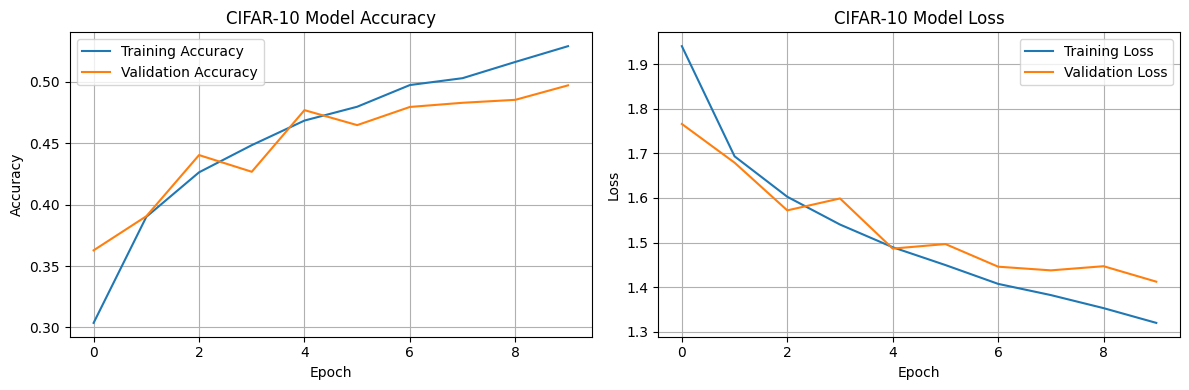

In [38]:
# Optional: Plot training history
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CIFAR-10 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CIFAR-10 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Exercise 3. Train your models in a GPUs

* Follow the instructions on how to install the libraries and drivers needed to use your local GPU.
* Train the models over the GPU and compare the differences with the CPU.
* Use also online access to GPUs such as those provided by Google Colab: https://colab.research.google.com/

## Exercise 4: Train your models in a supercomputing facilty as CESGA.

* Ask your professor for a students CESGA account.
* We don't have many available so in principle we will arrange them by practice pairs.
* Give your teacher the details of each pair and he/she will give you the details of the account.
* Follow the instructions on how to enter CESGA and train your models.

__Note__:
* The idea is to be doing these exercises throughout these weeks, while we do not publish the first practice.
* Exercises are not evaluable, it is a way for you to check that you have all the available tools well configured.
* It is not mandatory to use a CESGA account, it is just another option to take into account and of which you can take advantage.